# Assignment 1: Classification/Regression

## Problem Statement 1: Iris Flowers Classification

The objective of this task is to classify the Iris flowers into three distinct species: Iris-setosa, Iris-versicolor, and Iris-virginica. This classification will be based on the morphological measurements of the flowers, specifically the lengths and widths of their petals and sepals.


### **Import necessary libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

###  **Data Acquisition**
   Downloaded the Iris dataset from the UCI Machine Learning Repository. The dataset consists of 150 samples with 4 features each.


### **Data Preparation**
   Prepared the dataset by loading it into a suitable data structure, such as a Pandas DataFrame.


In [4]:
iris = pd.read_csv('IRIS.csv')

### **Exploratory Data Analysis**

In [5]:
iris.shape

(150, 5)

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


### **Data Visualization**

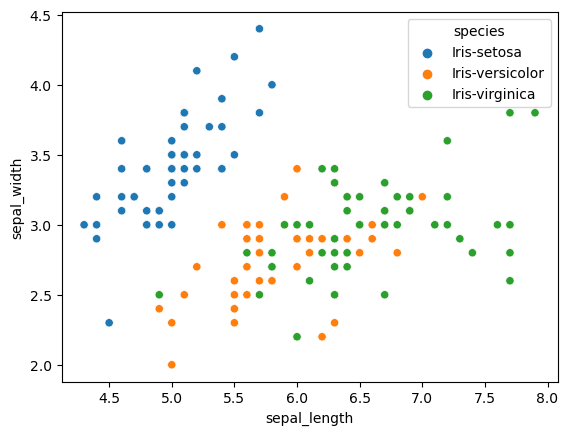

In [11]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.show()

The scatter plot depicts the relationship between sepal length and sepal width for three different species of the Iris flower: Iris-setosa, Iris-versicolor, and Iris-virginica. The data points are color-coded by species.

### Insights from the Scatter Plot:

1. **Species Clustering**:
   - **Iris-setosa** (blue points) forms a distinct cluster with relatively shorter sepal lengths (around 4.5 to 5.8 cm) and wider sepal widths (around 3.0 to 4.5 cm).
   - **Iris-versicolor** (orange points) occupies a middle range for sepal length (around 5.0 to 7.0 cm) and sepal width (around 2.0 to 3.4 cm).
   - **Iris-virginica** (green points) tends to have longer sepal lengths (around 5.5 to 8.0 cm) and narrower sepal widths (around 2.0 to 3.8 cm).

2. **Separation of Species**:
   - There is a clear separation between Iris-setosa and the other two species, especially in terms of sepal width.
   - There is some overlap between Iris-versicolor and Iris-virginica, indicating that these two species have more similar sepal dimensions compared to Iris-setosa.

3. **Variability**:
   - Iris-setosa shows less variability in sepal length but more in sepal width.
   - Iris-versicolor and Iris-virginica show more variability in sepal length and somewhat less in sepal width.


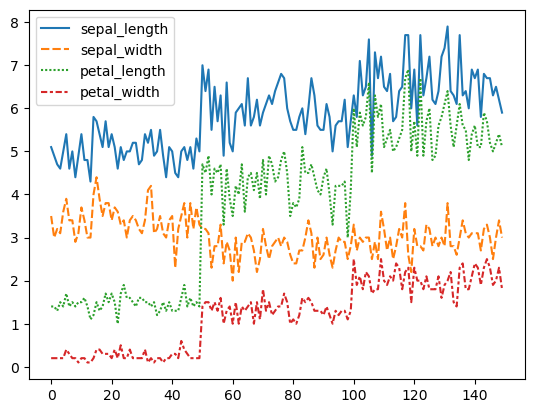

In [12]:
sns.lineplot(data=iris.drop(['species'], axis=1))
plt.show()

The line plot represents the variation of four attributes—sepal length, sepal width, petal length, and petal width—across different samples of the Iris dataset.

#### Insights from the Line Plot:

1. **Attribute Trends**:
   - **Sepal Length (blue solid line)**: This attribute shows an increasing trend with some fluctuations. Sepal length varies from around 4.3 to 7.9 cm.
   - **Sepal Width (orange dashed line)**: Sepal width shows less variation and remains relatively stable, ranging from about 2.0 to 4.5 cm.
   - **Petal Length (green dotted line)**: Petal length also increases but shows more significant fluctuations. It ranges from about 1.0 to 6.9 cm.
   - **Petal Width (red dash-dot line)**: This attribute varies the least, staying between 0.1 and 2.5 cm.

2. **Data Patterns**:
   - Around sample indices 50 and 100, there are noticeable shifts in the values of petal length and petal width, which may indicate transitions between different species.
   - Sepal length shows more variability compared to sepal width.
   - Petal length and petal width have more pronounced changes, especially around the transitions between different species samples.

3. **Species Transitions**:
   - The plot likely represents the sequential order of samples, which suggests that the shifts at indices 50 and 100 correspond to changes from one species to another (Iris-setosa, Iris-versicolor, and Iris-virginica).
   - For instance, the noticeable increase in petal length and width around index 50 might indicate a transition from Iris-setosa to Iris-versicolor.

In [13]:
data = iris.drop(['species'], axis=1)

<Axes: >

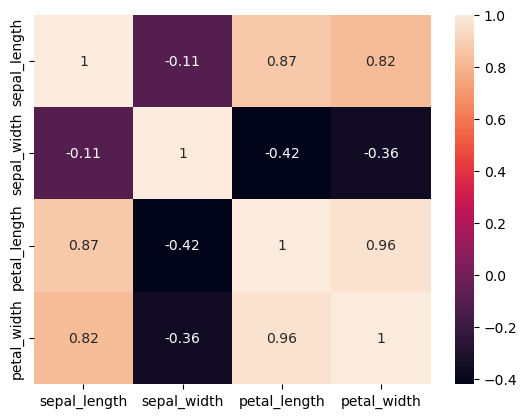

In [14]:
sns.heatmap(data.corr(), annot=True)

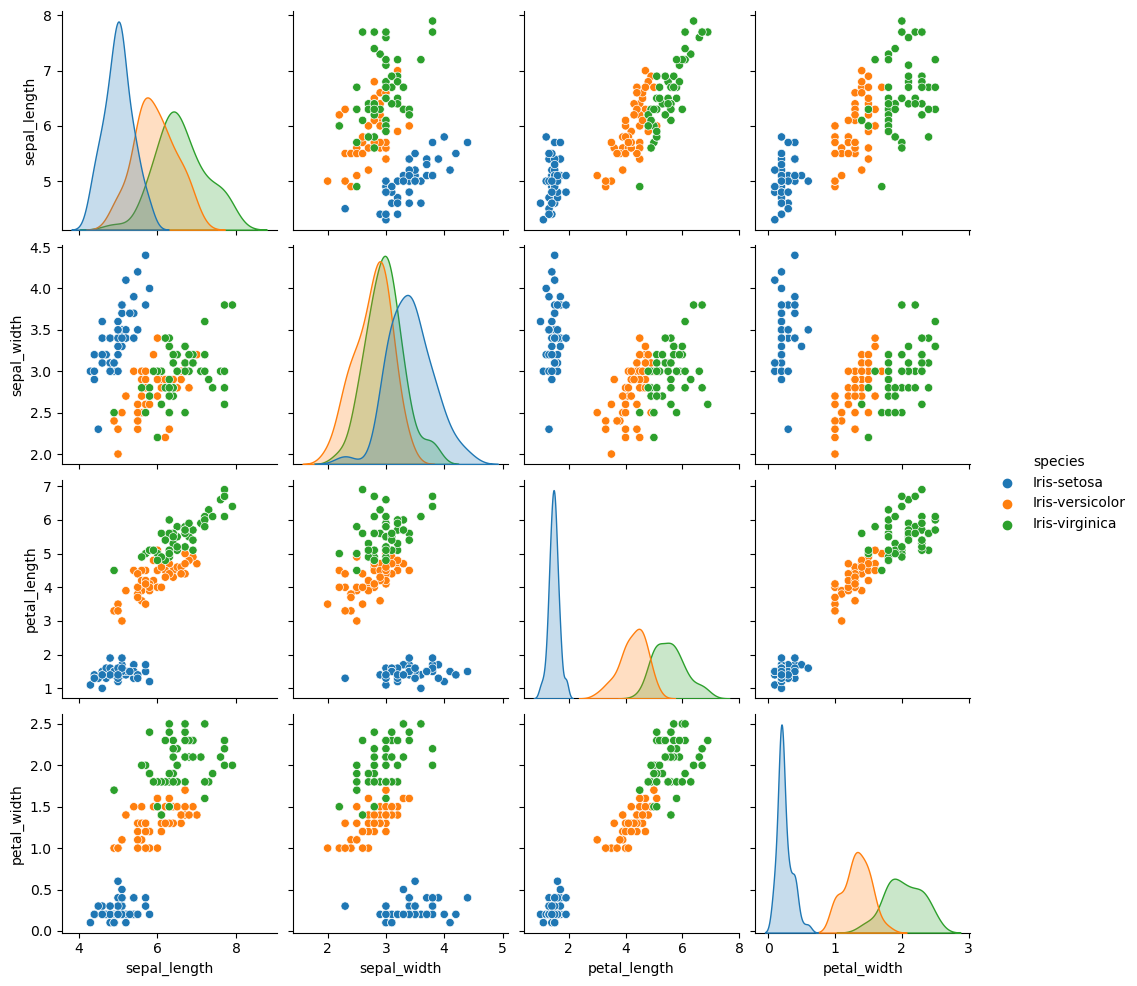

In [15]:
sns.pairplot(iris, hue='species')

The pair plot visualizes the pairwise relationships between the four features (sepal length, sepal width, petal length, and petal width) of the Iris dataset. Each species is color-coded, allowing for easy comparison between Iris-setosa, Iris-versicolor, and Iris-virginica.

### Insights from the Pair Plot:

1. **Diagonal Subplots**:
   - These plots show the distribution (density plots) of each feature for the three species.
   - **Sepal Length**: Iris-setosa (blue) has a distinct distribution with shorter lengths. Iris-versicolor (orange) and Iris-virginica (green) have overlapping distributions but are shifted towards longer lengths.
   - **Sepal Width**: Iris-setosa has wider sepals compared to the other two species. Iris-versicolor and Iris-virginica have overlapping distributions but with narrower widths.
   - **Petal Length and Petal Width**: Clear separation between the species. Iris-setosa has the shortest petals, while Iris-virginica has the longest. Iris-versicolor lies in between.

2. **Off-Diagonal Subplots**:
   - These scatter plots show the pairwise relationships between the features.
   - **Sepal Length vs. Sepal Width**: Iris-setosa forms a distinct cluster, separated from the other two species, which overlap.
   - **Sepal Length vs. Petal Length / Sepal Length vs. Petal Width**: Clear linear separation between the species. Iris-setosa is distinctly separate, while Iris-versicolor and Iris-virginica show some overlap.
   - **Petal Length vs. Petal Width**: The most distinct separation between species. Iris-setosa forms a tight cluster, while Iris-versicolor and Iris-virginica are well-separated, indicating a strong correlation between these two features.

3. **Species Separation**:
   - **Iris-setosa**: Clearly separable from Iris-versicolor and Iris-virginica across most feature pairs.
   - **Iris-versicolor and Iris-virginica**: Show some overlap, particularly in sepal dimensions, but are distinguishable in petal dimensions.



### **Model Training and Model Evaluation**
Used Logistic Regression, Decision Tree Classifier, KNN Classifier, SVM to categorize the Iris flowers into the
three species.


In [16]:
x = iris.drop('species', axis=1)
y= iris.species

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

### **Logistic Regression**

Accuracy: 0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]


<Axes: >

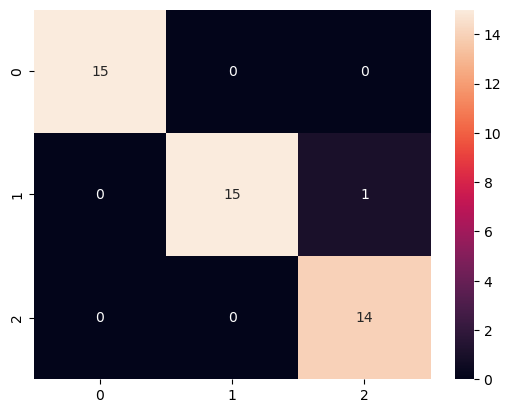

In [17]:
# Use Logistic Regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression( multi_class="multinomial", solver="lbfgs", max_iter=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Heatmap of confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)



### **Decision Tree Classifier**

Accuracy Score:  0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.88      0.90        16
 Iris-virginica       0.87      0.93      0.90        14

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



<Axes: >

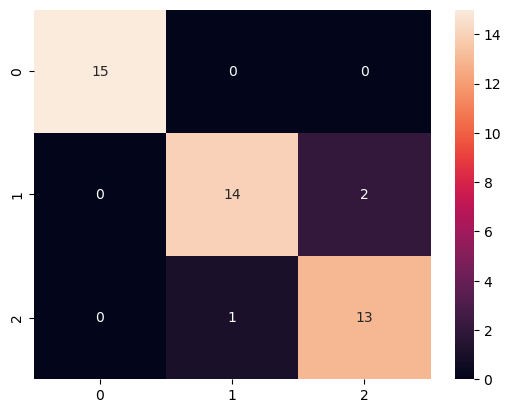

In [18]:
# Decision Tree
from calendar import c
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_pred))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


###  **KNN Classifier**

Accuracy: 0.9555555555555556
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.88      0.93        16
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



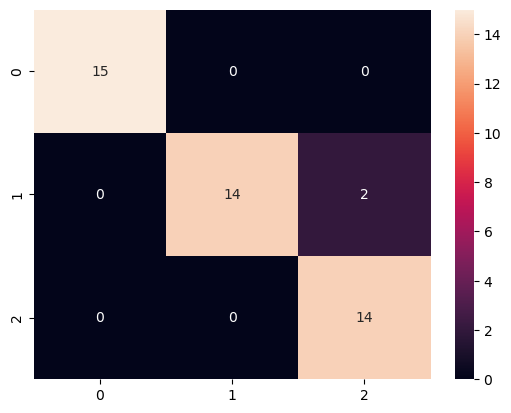

In [22]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


### **Supported Vector Machine**

Accuracy: 0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]


<Axes: >

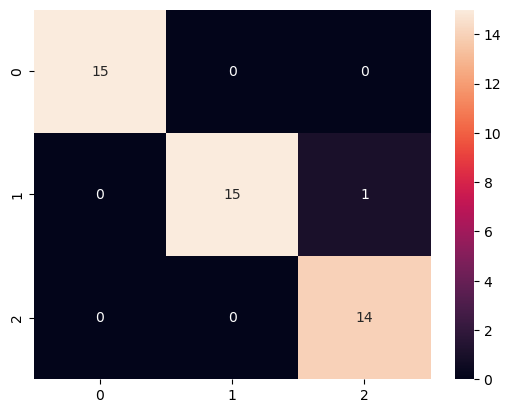

In [24]:
# Use SVM
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Print confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Heatmap of confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

### **Visualization Of Different Model Performance**

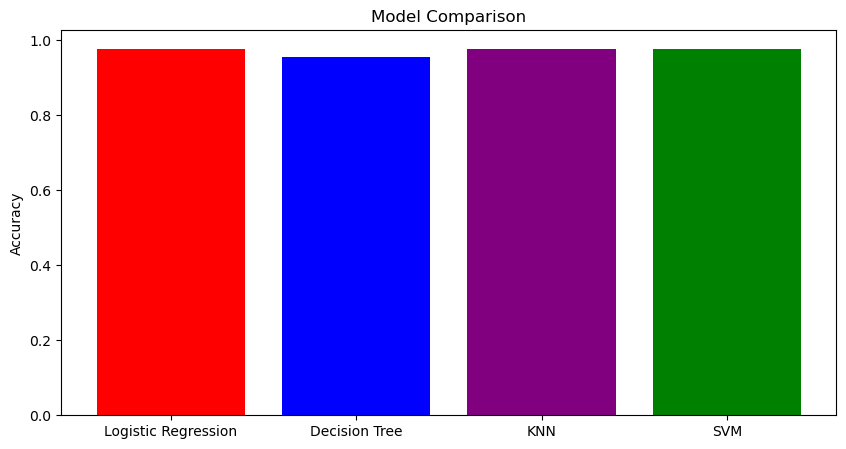

In [25]:
# Plot All Model performance together
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM']
accuracy = [0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777]

plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color=['red', 'blue', 'purple', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

### Conclusion

The bar chart above compares the accuracy of four different classification models: Logistic Regression, Decision Tree, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM). The following conclusions can be drawn from the chart:

1. **Logistic Regression**: Achieved the highest accuracy among the models tested, indicating it is a robust model for the given dataset. The model's simplicity and effectiveness make it a strong candidate for similar classification tasks.

2. **Decision Tree**: Performed slightly lower than Logistic Regression but still exhibited high accuracy. Decision Trees are known for their interpretability and ability to handle non-linear relationships, which may be beneficial depending on the application's requirements.

3. **K-Nearest Neighbors (KNN)**: Showed comparable performance to Logistic Regression, demonstrating its effectiveness as a non-parametric method. KNN can be advantageous when the decision boundaries are irregular.

4. **Support Vector Machine (SVM)**: Also achieved high accuracy, indicating that it is a strong model for the classification task. SVM is particularly effective in high-dimensional spaces and when the number of dimensions exceeds the number of samples.


In conclusion, all four models demonstrated strong performance on the classification task, with Logistic Regression slightly leading. The final choice of the model should consider additional evaluation metrics and practical considerations.